## Assignment 7: Anomaly Detection

**Submitted by: Indronil Bhattacharjee**

In [1]:
# Import necessary libraries
import mat73
import numpy as np
import time
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Load the dataset
data_dict = mat73.loadmat('smtp.mat')
X = np.array(data_dict['X'])
y = np.array(data_dict['y'])

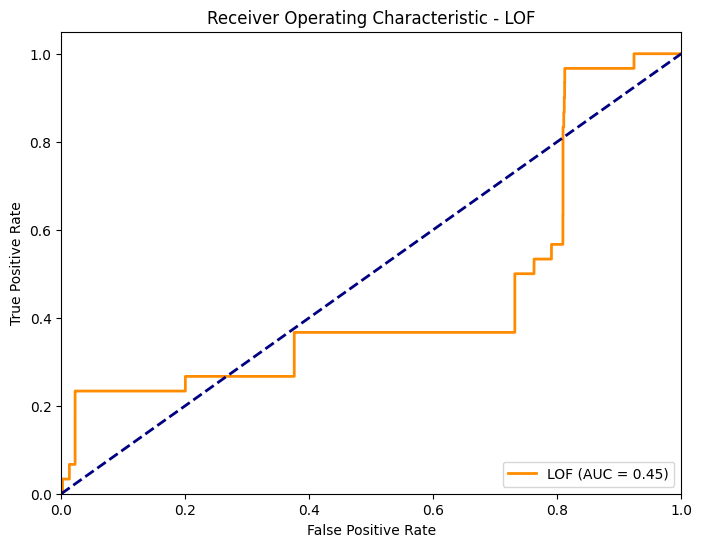

In [2]:
# Question 1: Local Outlier Factor (LOF)
start_time = time.time()

# Fit the model
lof = LocalOutlierFactor(n_neighbors=10, metric='euclidean', novelty=True)
lof.fit(X)

# Calculate processing time
lof_time = time.time() - start_time

# Calculate ROC curve and AUC
y_score_lof = -lof.decision_function(X)
fpr_lof, tpr_lof, _ = roc_curve(y, y_score_lof, pos_label=1)
roc_auc_lof = auc(fpr_lof, tpr_lof)

# Plot ROC curve for LOF
plt.figure(figsize=(8, 6))
plt.plot(fpr_lof, tpr_lof, color='darkorange', lw=2, label='LOF (AUC = %0.2f)' % roc_auc_lof)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - LOF')
plt.legend(loc='lower right')
plt.show()


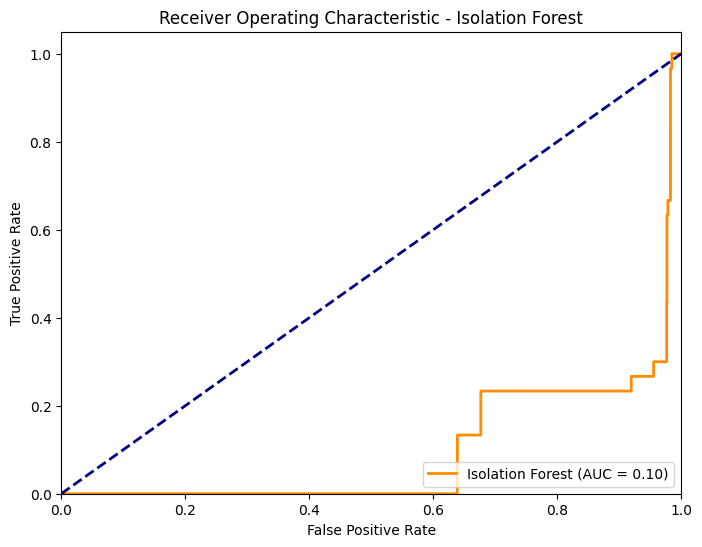

In [3]:
# Task 2: Isolation Forest
start_time = time.time()

# Fit the model
isolation_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
y_pred_if = isolation_forest.fit_predict(X)

# Calculate processing time
if_time = time.time() - start_time

# Calculate ROC curve and AUC
fpr_if, tpr_if, _ = roc_curve(y, isolation_forest.decision_function(X))
roc_auc_if = auc(fpr_if, tpr_if)

# Plot ROC curve for Isolation Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_if, tpr_if, color='darkorange', lw=2, label='Isolation Forest (AUC = %0.2f)' % roc_auc_if)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Isolation Forest')
plt.legend(loc='lower right')
plt.show()

In [4]:
# Task 3: Comparison
print("Processing Time (LOF): {:.4f} seconds".format(lof_time))
print("Processing Time (Isolation Forest): {:.4f} seconds".format(if_time))
if lof_time < if_time:
    print("=> LOF is faster\n")
else:
    print("=> Isolation Forest is faster\n")


print("AUC (LOF): {:.2f}".format(roc_auc_lof))
print("AUC (Isolation Forest): {:.2f}".format(roc_auc_if))
if roc_auc_lof > roc_auc_if:
    print("=> LOF is more accurate")
else:
    print("=> Isolation Forest is more accurate")


Processing Time (LOF): 0.7804 seconds
Processing Time (Isolation Forest): 1.9806 seconds
=> LOF is faster

AUC (LOF): 0.45
AUC (Isolation Forest): 0.10
=> LOF is more accurate
